# Pre-Masters Maths 6601PMEC

## Week 10 - Laplace Transforms

#### **Examples LT1**

1. Find the solutions of the following simultaneous differential equations:  
a) $$\frac{dx}{dt} = 3x + 2y \quad \frac{dy}{dt}=x+4y$$
if $x(0)=1$ and $y(0)=4$.

In [1]:
from sympy import *
init_printing()
t, s = symbols('t s')

1.  Determine the Laplace transforms for the following functions:  
  a)  $3e^{-4t} -5e^{4t}$

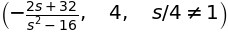

In [2]:
laplace_transform(3*exp(-4*t) - 5*exp(4*t), t, s)

  l) $5t^2 + 4t -3$

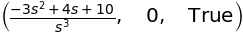

In [3]:
laplace_transform(5*t**2 + 4*t - 3, t, s)

 2. Determine the inverse Laplace transforms of:  
 a) $ \dfrac{1}{3s^5} - \dfrac{2}{3s^2}$

In [4]:
t = symbols('t', positive=True) #assumption to remove Heaviside term in inverse laplace transforms

In [5]:
expand(inverse_laplace_transform( 1/(3*s**5) - 2/(3*s**2), s, t))

   j) $\dfrac{s-5}{s^2 + 4s + 20}$

In [6]:
expand(inverse_laplace_transform( (s-5)/(s**2 + 4*s + 20), s, t))

#### **Examples LT2**

1. Solve the following first order differential equations using the Laplace transform technique:  
a) $\dfrac{dy}{dt} - y = 0 \quad y(0)=3$

In [7]:
C1, C2 = symbols('C1 C2')
t = symbols('t', positive=True)
y = Function('y')(t)
dydt = y.diff(t)

**Method 1** - Solve using the _dsolve_ command...

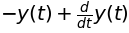

In [8]:
Eq1 = dydt - y
Eq1

In [9]:
genEq1 = dsolve(Eq1)
genEq1

In [10]:
c1Eq1 = solve(genEq1.subs({y:3, t:0}),C1)[0]
c1Eq1

In [11]:
prtEq1 = genEq1.subs(C1, c1Eq1)
prtEq1

**Method 2** - Solve using the laplace transform method...

In [12]:
y = Function('y')
s, Y = symbols('s Y', real=True)

In [13]:
L_y = laplace_transform(y(t), t, s)
L_y

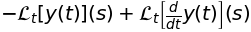

In [14]:
L_ode = expand(laplace_transform(Eq1, t, s, noconds=True))
L_ode

**The quote and code snippet is from 'Numerical Python: A Practical Techniques Approach for Industry' by Robert Johansson (p.218-219):**  
  
When Laplace transforming the unknown function $y(t)$ we get the undetermined result $\mathcal{L}_{t}\left[y{\left(t \right)}\right]\left(s\right)$, which is to be expected. However, applying laplace_transform on a derivative of $y(t)$, such as $\dfrac{d}{dt} y(t)$, results in the unevaluated expression $\mathcal{L}_{t} \left[ \dfrac{d}{dt} y  \left(t \right)  \right] \left( s \right)$. 
This is not the desired result, and we need to work around this issue to obtain the sought-after algebraic equation. The Laplace transformation if the derivative of an unknown function has a well-known form that involves the Laplace transform of the function itself, rather than its derivatives. For the $n$th derivative of a function $y(t)$, the formula is:  
$$\mathcal{L}_{t}\left[\dfrac{d^n}{d t^n} y{\left(t \right)}\right]\left(s\right) = s^n \mathcal{L}_{t} \left[ y(t) \right] (s) - \sum_{m =0}^{n-1} s^{n-m-1} \dfrac{d^m}{dt^m} y(t)$$
By iterating through the SymPy expression tree for L_ode, and replacing the occurrences of $ \mathcal{L}_{t}\left[\dfrac{d^n}{d t^n} y{\left(t \right)}\right]\left(s\right) $ with expressions of the form given the formula above, we can obtain the algebraic form of the ODE that we seek. The following functions takes a Laplace-transformed ODE and performs the substitution of the unevaluated Laplace transforms of the derivatives of $y(t)$.

In [15]:
def laplace_transform_derivatives(e):
    #Evaluate the unevaluated laplace transforms of derivatives of functions
    if isinstance(e, LaplaceTransform):
        if isinstance(e.args[0], Derivative):
            d, t, s = e.args
            n = len(d.args) -1
            return ((s**n) * LaplaceTransform(d.args[0], t, s) -
                    sum([s**(n-i) * diff(d.args[0], t, i-1).subs(t,0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (Add, Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

In [16]:
L_ode2 = laplace_transform_derivatives(L_ode)
L_ode2

In [17]:
L_ode3 = L_ode2.subs(L_y, Y)
L_ode3

In [18]:
YFunc1 = solve(L_ode3.subs({y(0) : 3}), Y)[0]
YFunc1

In [19]:
inverse_laplace_transform(YFunc1, s, t)

***  
  
by Dr J T Wharton

***